In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data as panda data frame
df = pd.read_csv("turkey_car_market.csv")

In [3]:
df.head(15)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,03/06/2020,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000
7,02/06/2020,Acura,CL,-,2014.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
8,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Beyaz,Sedan,Yetkili,0 km,15662,189000
9,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Gri,Sedan,Yetkili,0 km,31971,189000


In [4]:
df.rename(columns={"İlan Tarihi": "date", "Marka": "brand", 
                   "Arac Tip Grubu": "model", "Arac Tip": "engine_size",
                  "Model Yıl": "year", "Vites": "gear_type", "Yakıt Turu": "fuel_type",
                   "Beygir Gucu": "HP", "Renk": "color",
                  "Kasa Tipi": "body_type","Kimden": "seller",
                  "Durum": "status", "Km": "km", "Fiyat": "price"}, inplace=True)

In [5]:
df = df[df['status'] != '0 km']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8798 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8798 non-null   object 
 1   brand        8798 non-null   object 
 2   model        8798 non-null   object 
 3   engine_size  8798 non-null   object 
 4   year         8798 non-null   float64
 5   fuel_type    8798 non-null   object 
 6   gear_type    8798 non-null   object 
 7   CCM          8798 non-null   object 
 8   HP           8798 non-null   object 
 9   color        8798 non-null   object 
 10  body_type    8798 non-null   object 
 11  seller       8798 non-null   object 
 12  status       8798 non-null   object 
 13  km           8798 non-null   int64  
 14  price        8798 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8798.0,2011.635258,6.580899,1959.0,2009.0,2014.0,2016.00,2020.0
km,8798.0,138999.491930,92405.140535,0.0,72000.0,128707.0,197323.25,1850000.0
price,8798.0,135388.799955,164251.867845,5500.0,59500.0,93000.0,149000.00,5086500.0


In [8]:
df.shape

(8798, 15)

# Detecting Missing Values

In [9]:
for i in df.columns:

    print(i, len(df.loc[df[i] == "Bilmiyorum"]))

date 0
brand 0
model 0
engine_size 0
year 0
fuel_type 0
gear_type 0
CCM 108
HP 5430
color 0
body_type 0
seller 0
status 0
km 0
price 0


In [10]:
for i in df.columns:

    print(i, len(df.loc[df[i] == "-"]))

date 0
brand 0
model 0
engine_size 44
year 0
fuel_type 0
gear_type 0
CCM 1
HP 1
color 0
body_type 0
seller 0
status 0
km 0
price 0


In [11]:
missing_value = 'Bilmiyorum'

df['HP'].replace(missing_value, pd.NA, inplace=True)

In [12]:
missing_value = 'Bilmiyorum'

df['CCM'].replace(missing_value, pd.NA, inplace=True)

In [13]:
missing_value = '-'

df['engine_size'].replace(missing_value, pd.NA, inplace=True)

In [14]:
def take_average_HP(cell):
    if pd.notna(cell):
        # Select numeric columns
        if isinstance(cell, (int, float)):
            return cell
        # Check non-numeric expressions
        elif 've altı' in cell:
            return 100  # Take '100 hp and below' as 100
        else:
            # Split numeric range at '-' character
            numbers = [int(s) for s in re.findall(r'\d+', str(cell))]
            # Average if the number exists, otherwise return the same value
            return sum(numbers) / len(numbers) if numbers else cell
    else:
        return pd.NA

In [15]:
def take_average_CCM(cell):
    if pd.notna(cell):
        # Select numeric columns
        if isinstance(cell, (int, float)):
            return cell
        # Check non-numeric expressions
        elif 've altı' in cell:
            return 1300  # Take '1300 ccm and below' as 1300
        else:
            # Split numeric range at '-' character
            numbers = [int(s) for s in re.findall(r'\d+', str(cell))]
            # Average if the number exists, otherwise return the same value
            return sum(numbers) / len(numbers) if numbers else cell
    else:
        return pd.NA

In [16]:
# Run the function on DataFrame
df['HP'] = df['HP'].apply(take_average_HP)

# Convert column to float type
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')

# Run the function on DataFrame
df['CCM'] = df['CCM'].apply(take_average_CCM)

# Convert column to float type
df['CCM'] = pd.to_numeric(df['CCM'], errors='coerce')

In [17]:
missing_value = '-'

df['CCM'].replace(missing_value, pd.NA, inplace=True)

In [18]:
missing_value = '-'

df['HP'].replace(missing_value, pd.NA, inplace=True)

In [19]:
df.isna().sum()

date              0
brand             0
model             0
engine_size      44
year              0
fuel_type         0
gear_type         0
CCM             109
HP             5431
color             0
body_type         0
seller            0
status            0
km                0
price             0
dtype: int64

In [20]:
df['age'] = 2020 - df['year']
df.drop('year', axis=1,inplace=True)

In [21]:
def fill_null(column):
    # Group by 'brand'
    groups = df.groupby('brand')
    
    # Calculate the mean of the column for each group
    mean_values = groups[column].mean()
    
    # Fill null values
    df[column] = df.apply(lambda row: row[column] if pd.notna(row[column]) else mean_values[row['brand']], axis=1)
    
    return df

# Apply the function on the DataFrame
df = fill_null('HP')
df = fill_null('CCM')

In [22]:
df.isna().sum()

date            0
brand           0
model           0
engine_size    44
fuel_type       0
gear_type       0
CCM             1
HP             44
color           0
body_type       0
seller          0
status          0
km              0
price           0
age             0
dtype: int64

#      Visualization

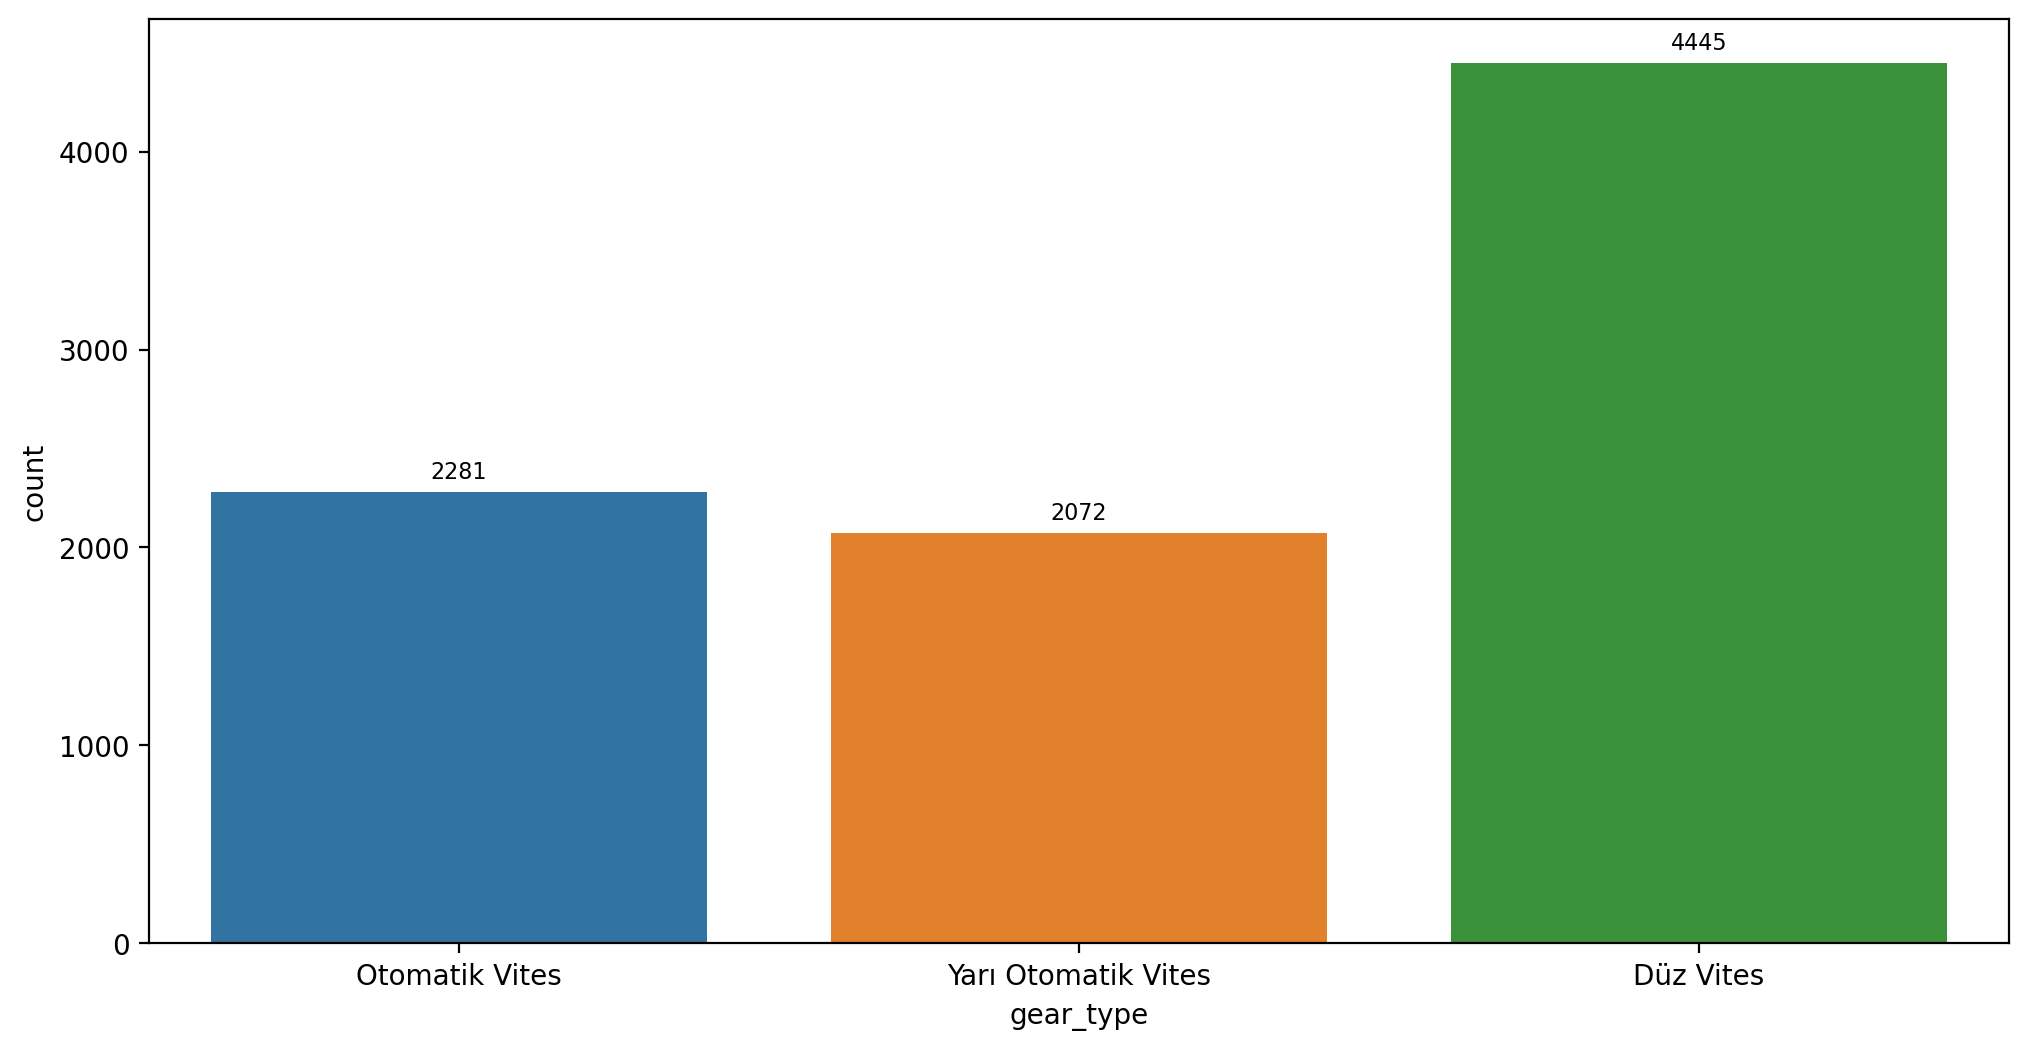

In [23]:
plt.figure(figsize=(12, 6), dpi=200)

ax = sns.countplot(data=df, x="gear_type")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

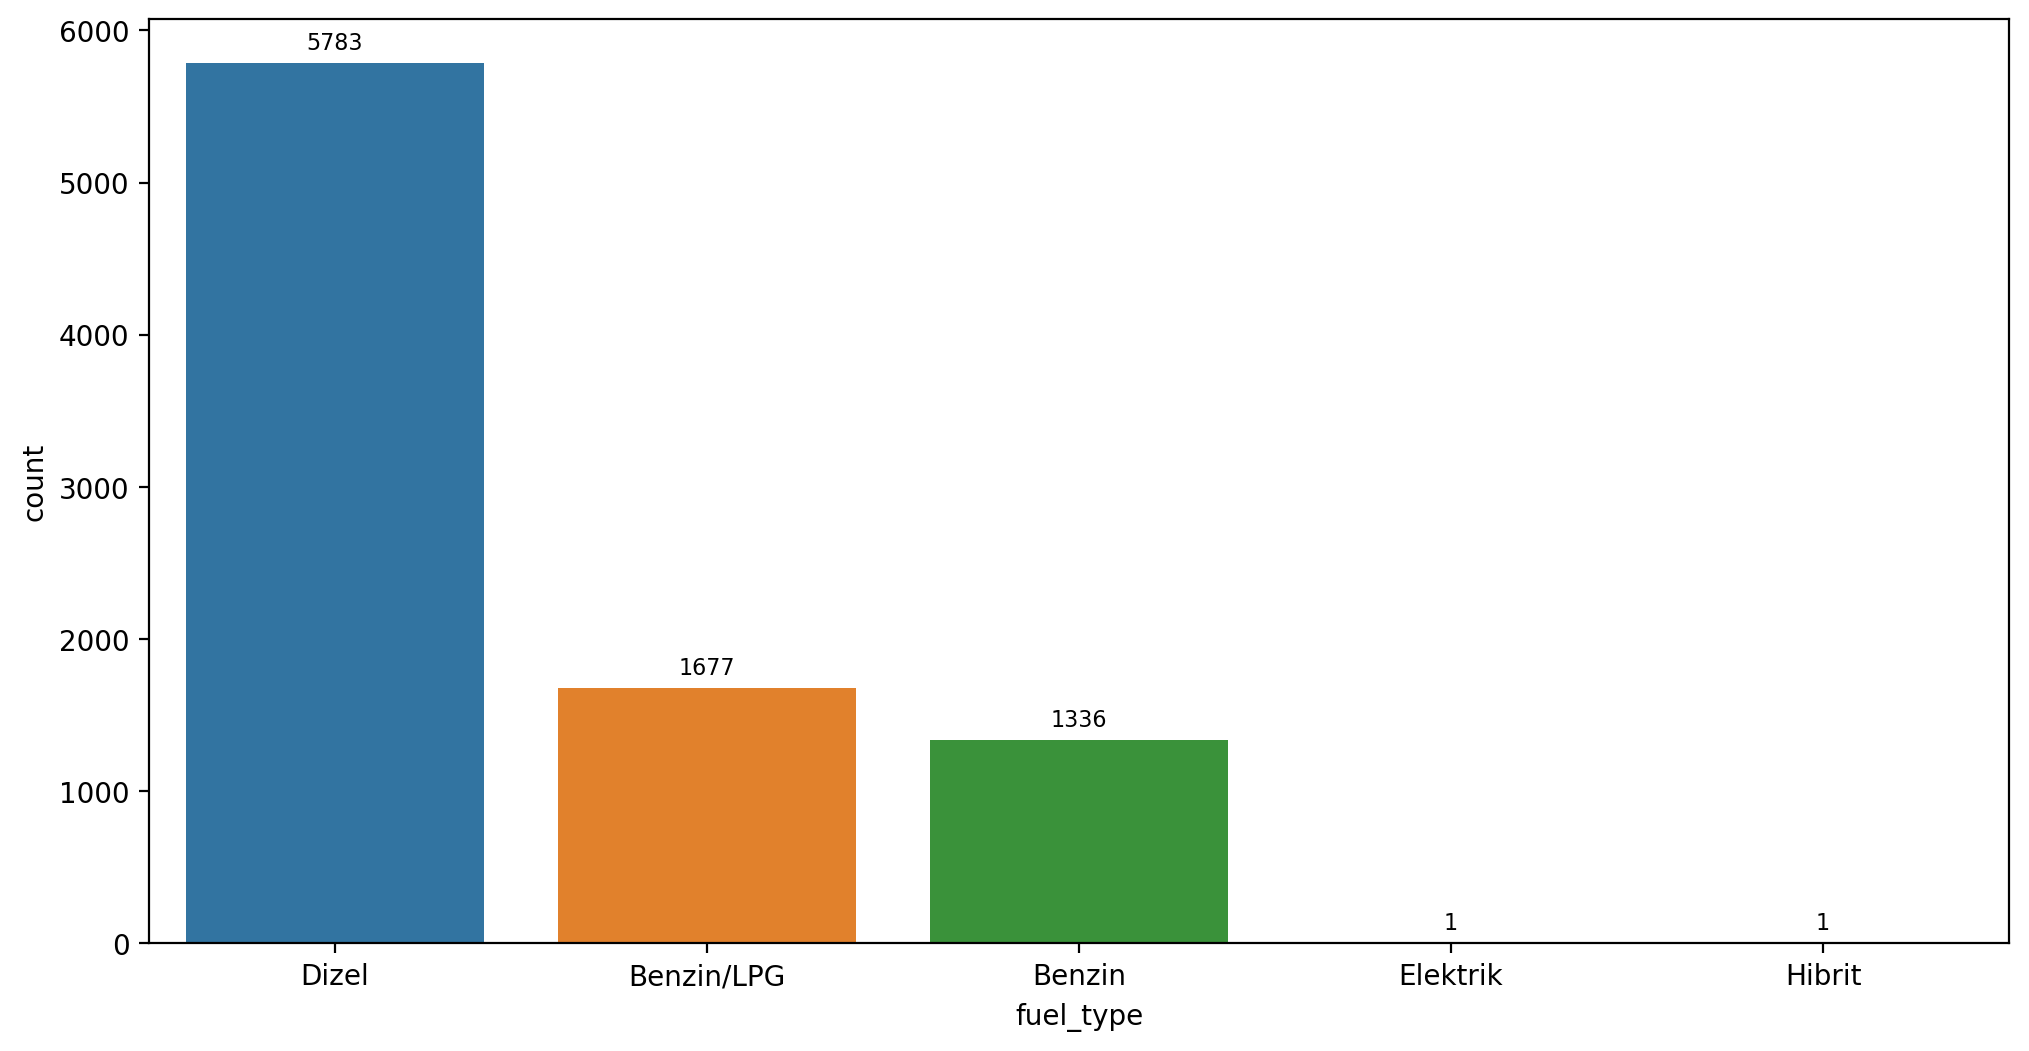

In [24]:
plt.figure(figsize=(12, 6), dpi=200)

# Seaborn countplot
ax = sns.countplot(data=df, x="fuel_type")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

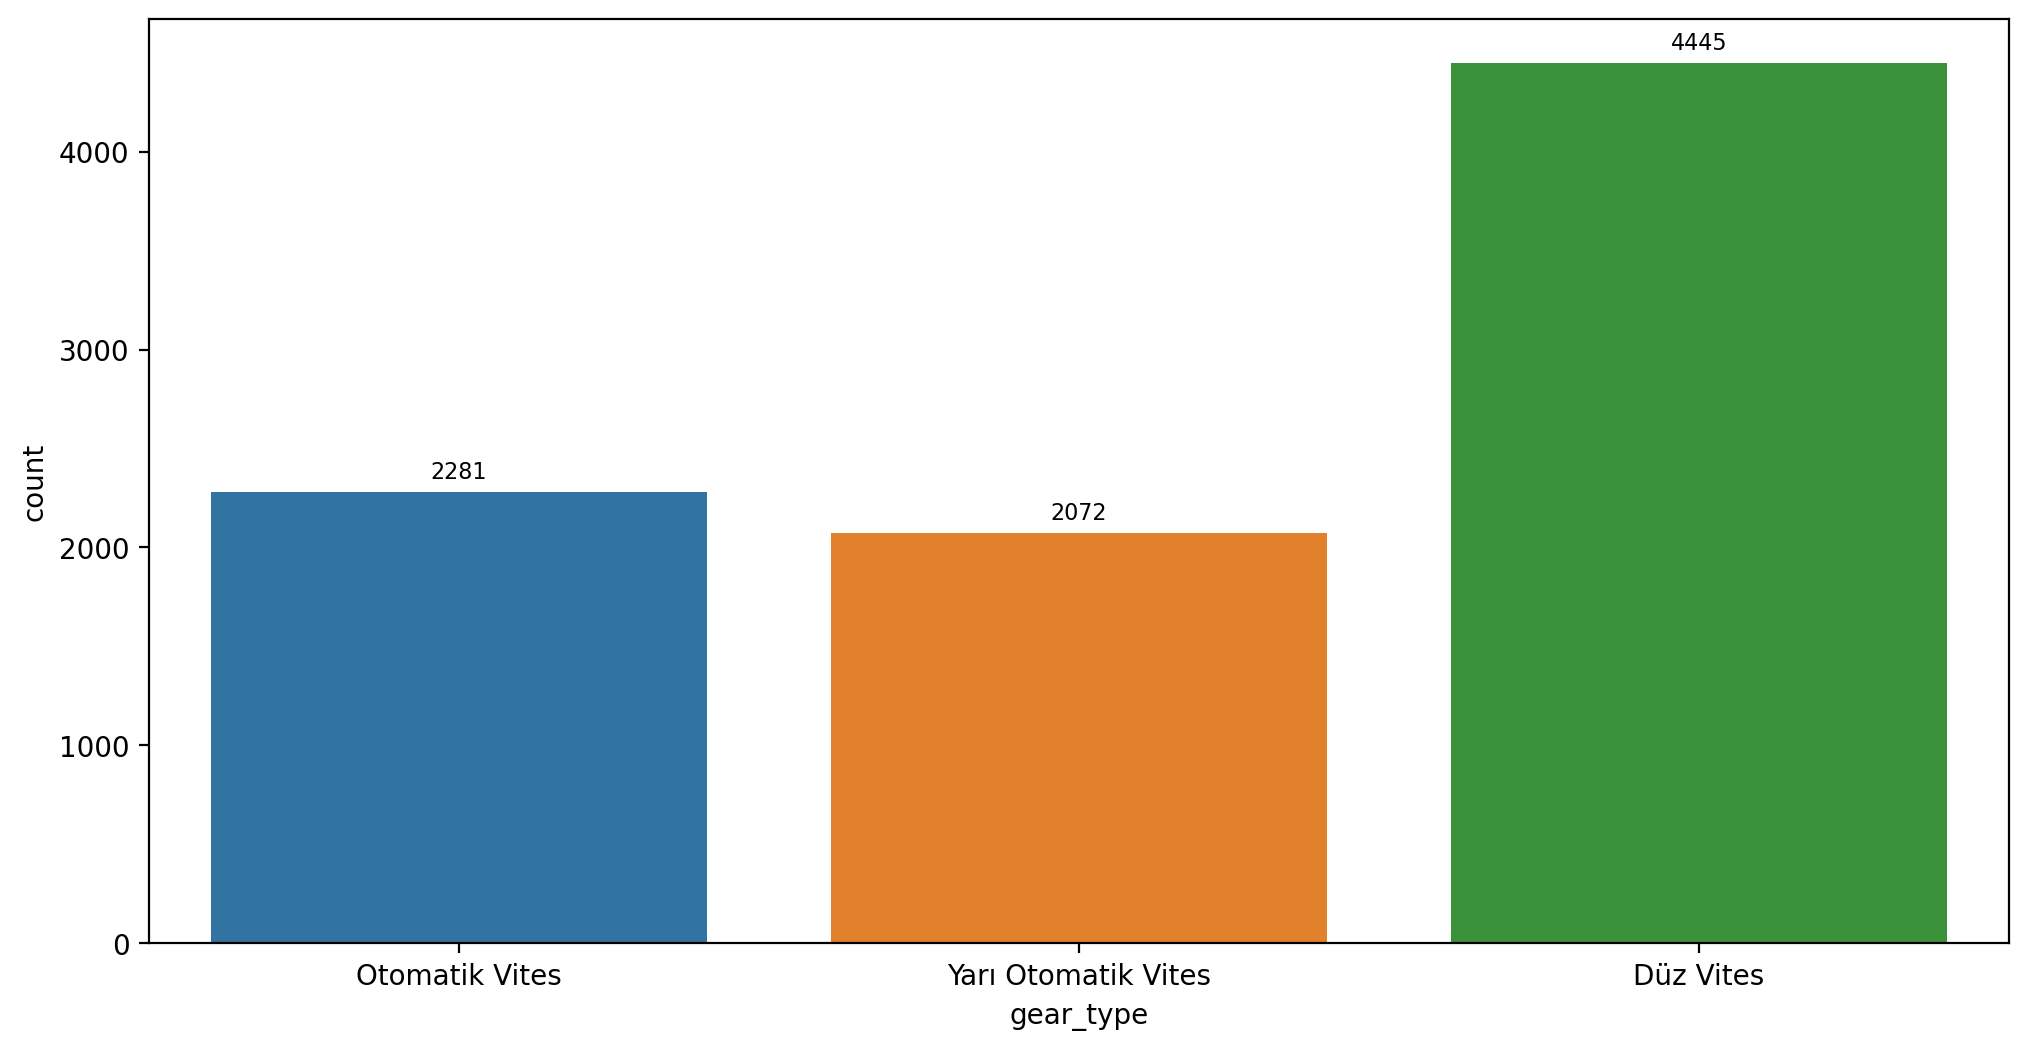

In [25]:
plt.figure(figsize=(12, 6), dpi=200)

# Seaborn countplot
ax = sns.countplot(data=df, x="gear_type")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

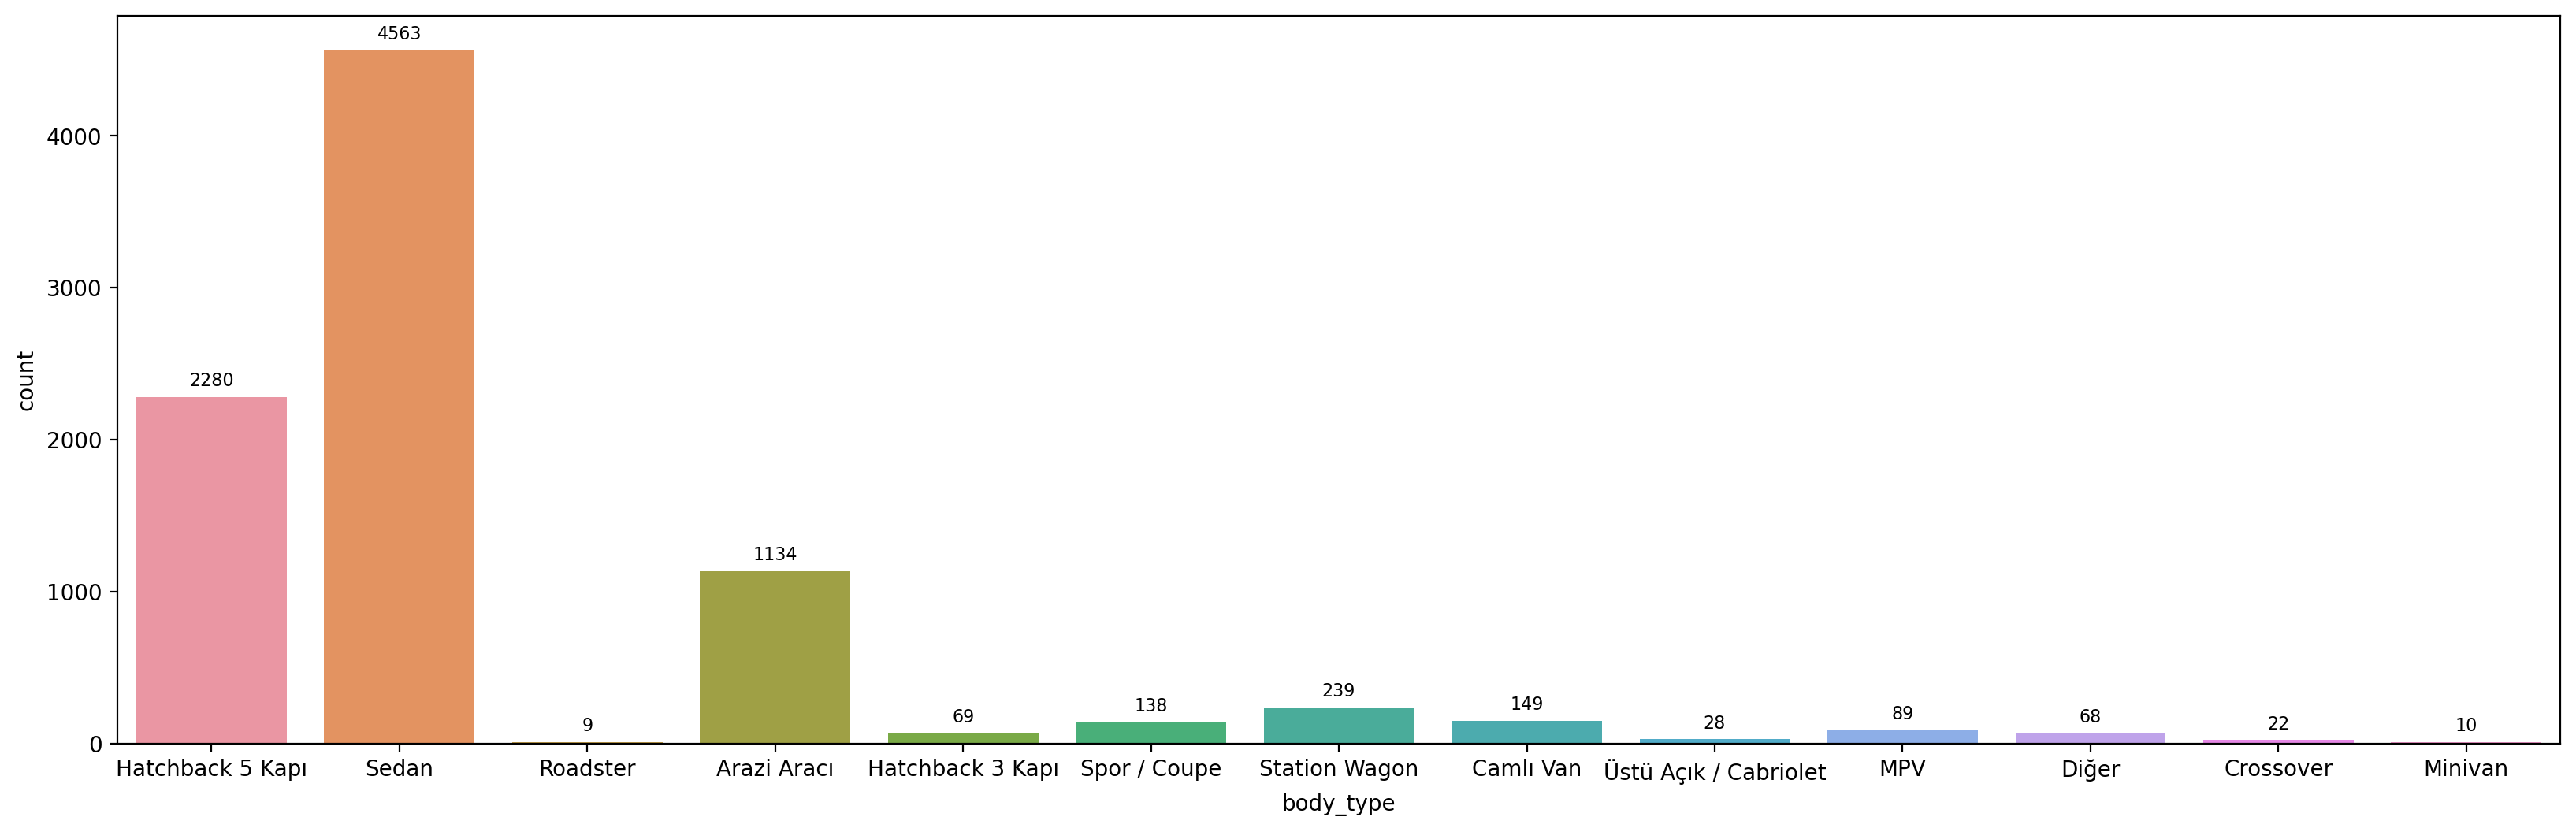

In [26]:
plt.figure(figsize=(20, 6), dpi=200)

# Seaborn countplot
ax = sns.countplot(data=df, x="body_type")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

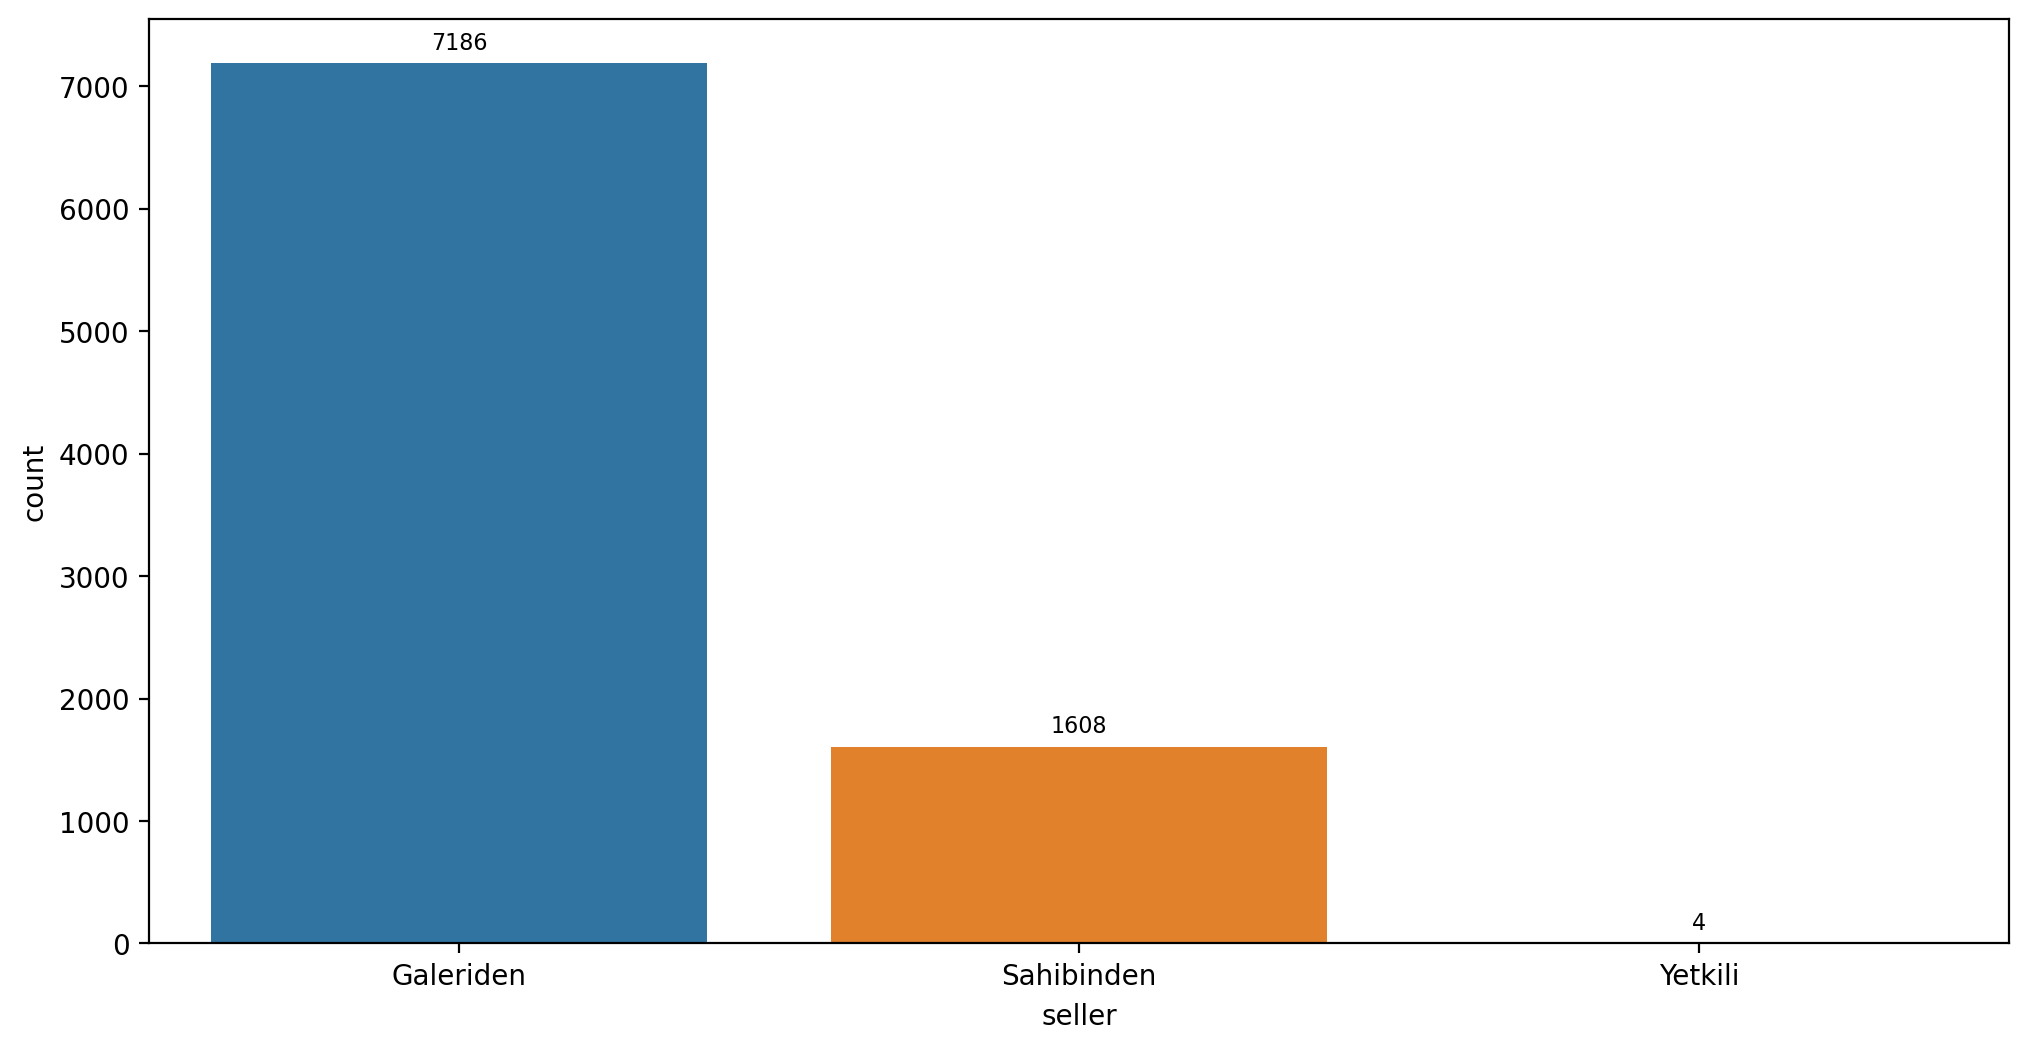

In [27]:
plt.figure(figsize=(12, 6), dpi=200)

# Seaborn countplot
ax = sns.countplot(data=df, x="seller")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

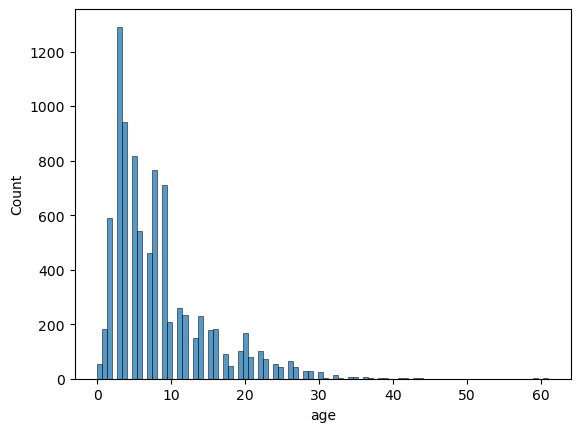

In [28]:
sns.histplot(data=df, x="age")

<AxesSubplot:xlabel='age', ylabel='km'>

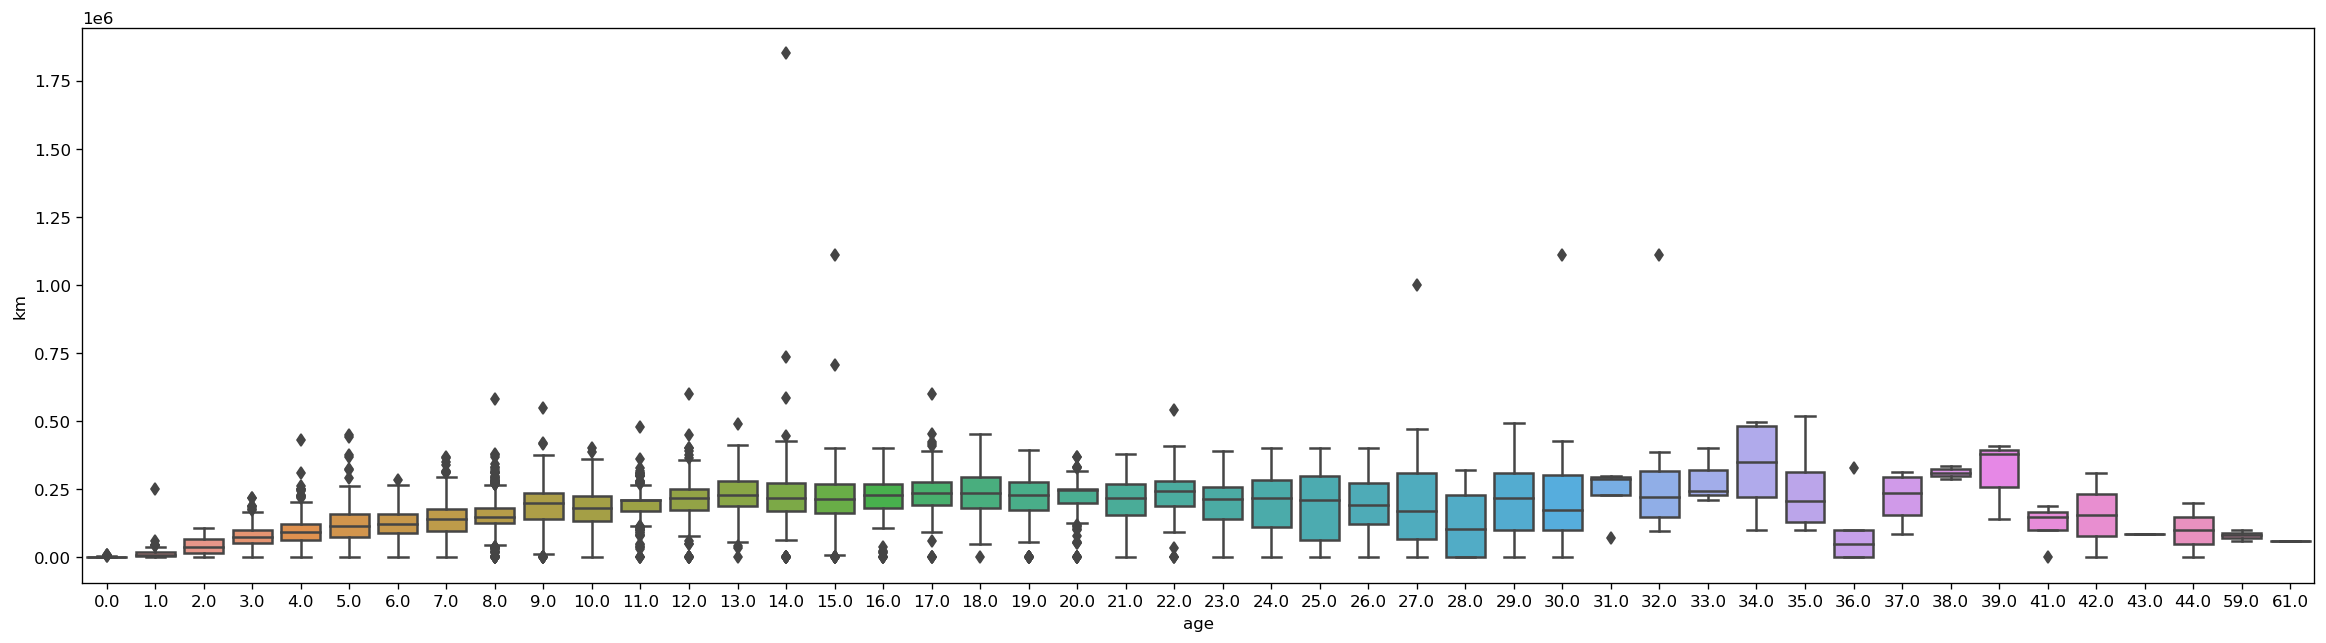

In [29]:
plt.figure(figsize=(24,6), dpi=120)
sns.boxplot(data=df, x="age", y="km")

<AxesSubplot:xlabel='age', ylabel='price'>

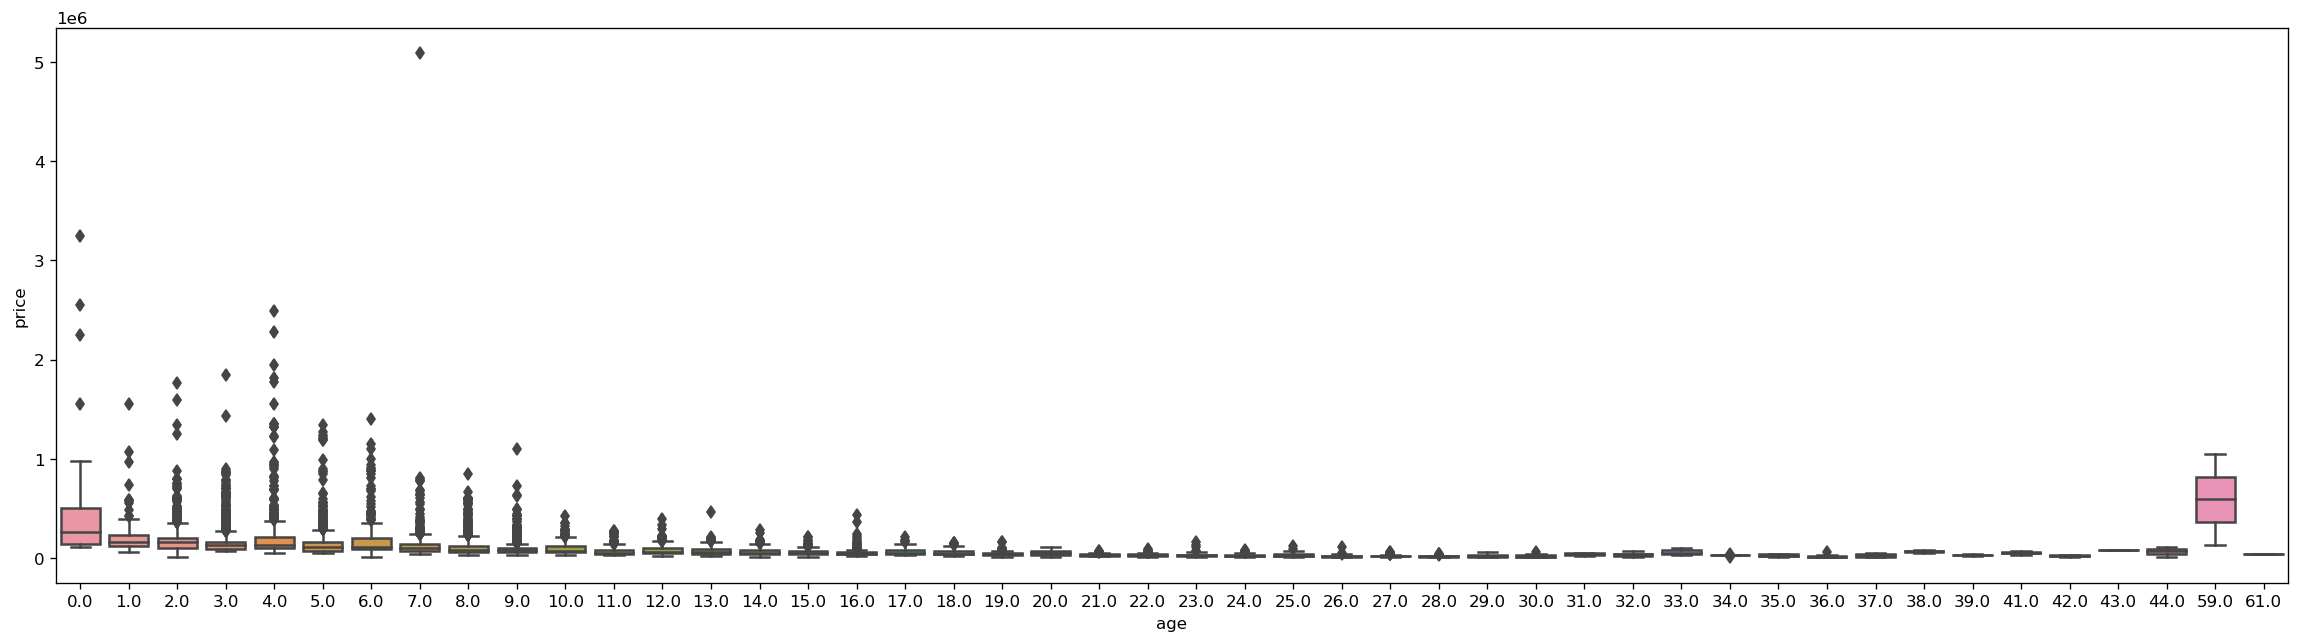

In [30]:
plt.figure(figsize=(24,6), dpi=120)
sns.boxplot(data=df, x="age", y="price")

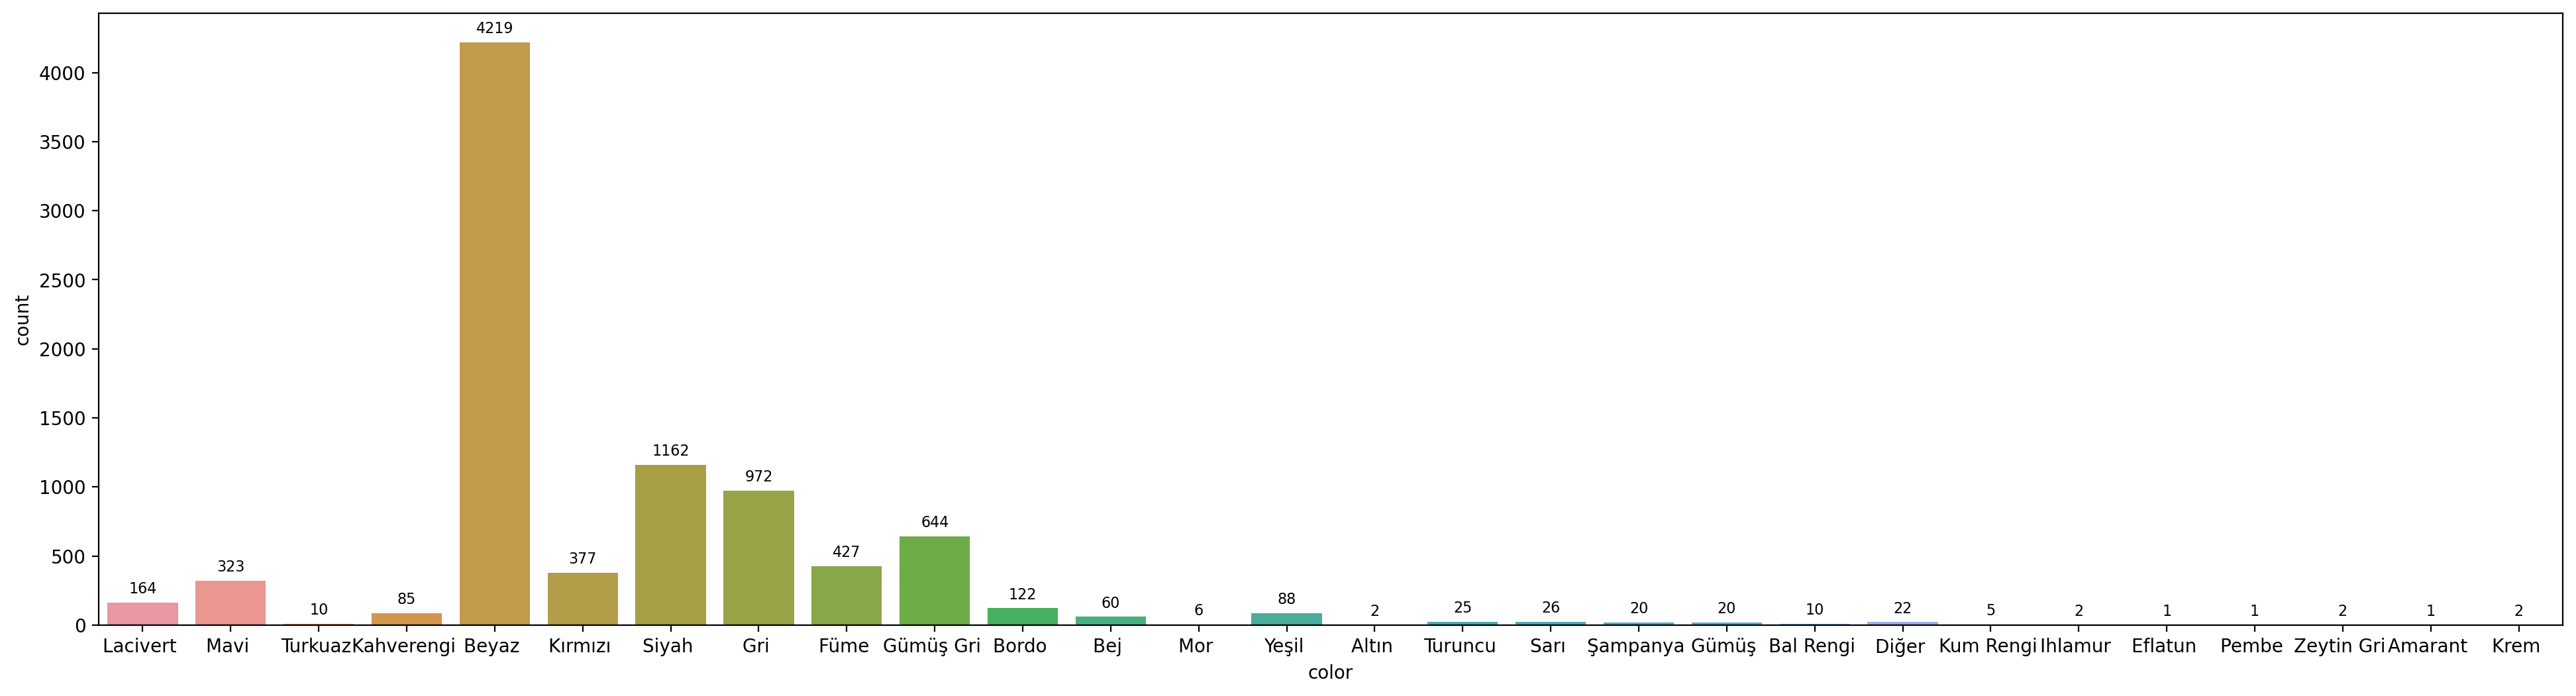

In [31]:
plt.figure(figsize=(24, 6), dpi=200)

# Seaborn countplot
ax = sns.countplot(data=df, x="color")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<AxesSubplot:xlabel='color', ylabel='price'>

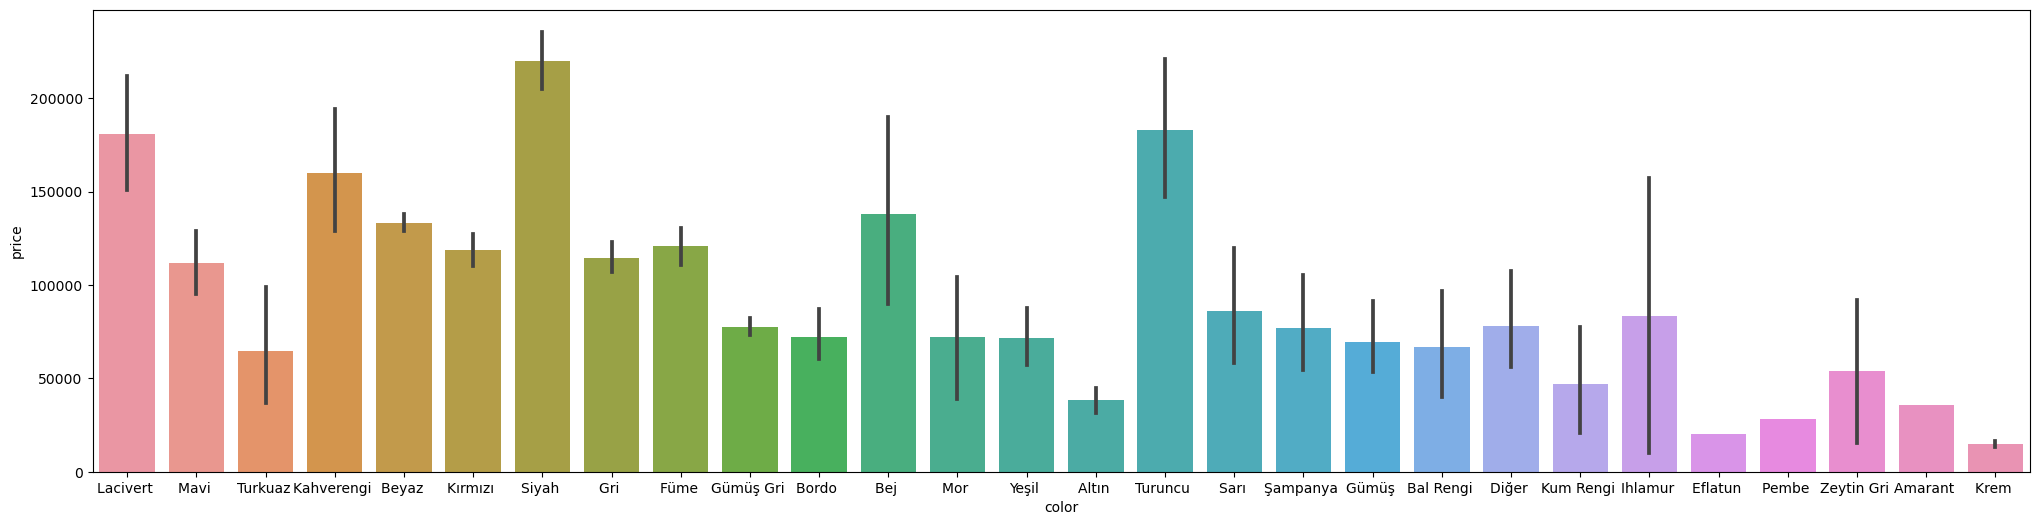

In [32]:
fig, ax = plt.subplots(figsize = (25, 6))
sns.barplot(x = df["color"], y = df["price"])

<AxesSubplot:xlabel='status', ylabel='price'>

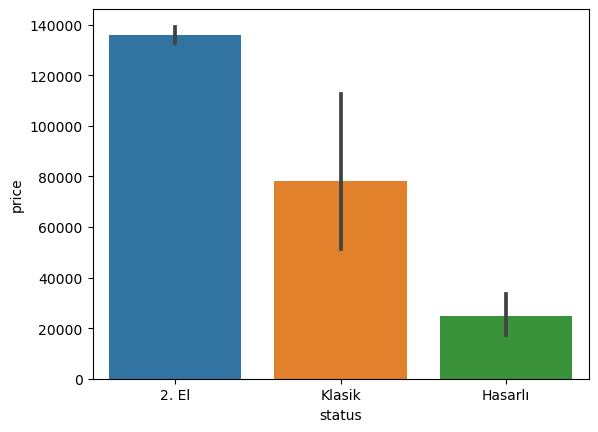

In [33]:
sns.barplot(x = df["status"], y = df["price"], data = df)

<AxesSubplot:xlabel='seller', ylabel='price'>

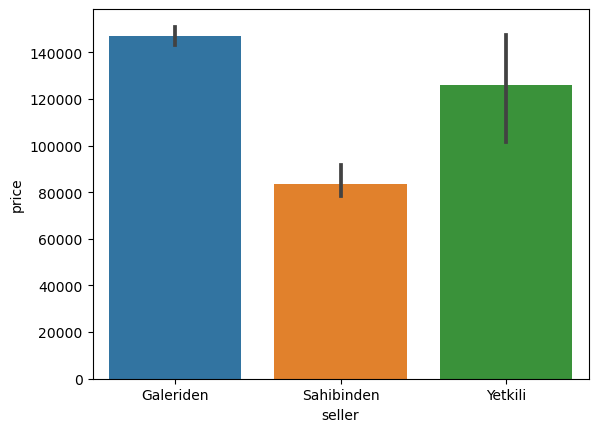

In [34]:
sns.barplot(x = df["seller"], y = df["price"], data = df)

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

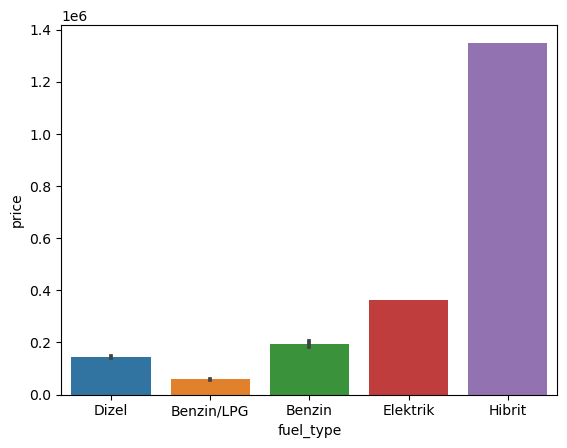

In [35]:
sns.barplot(x = df["fuel_type"], y = df["price"], data = df)

<AxesSubplot:xlabel='body_type', ylabel='price'>

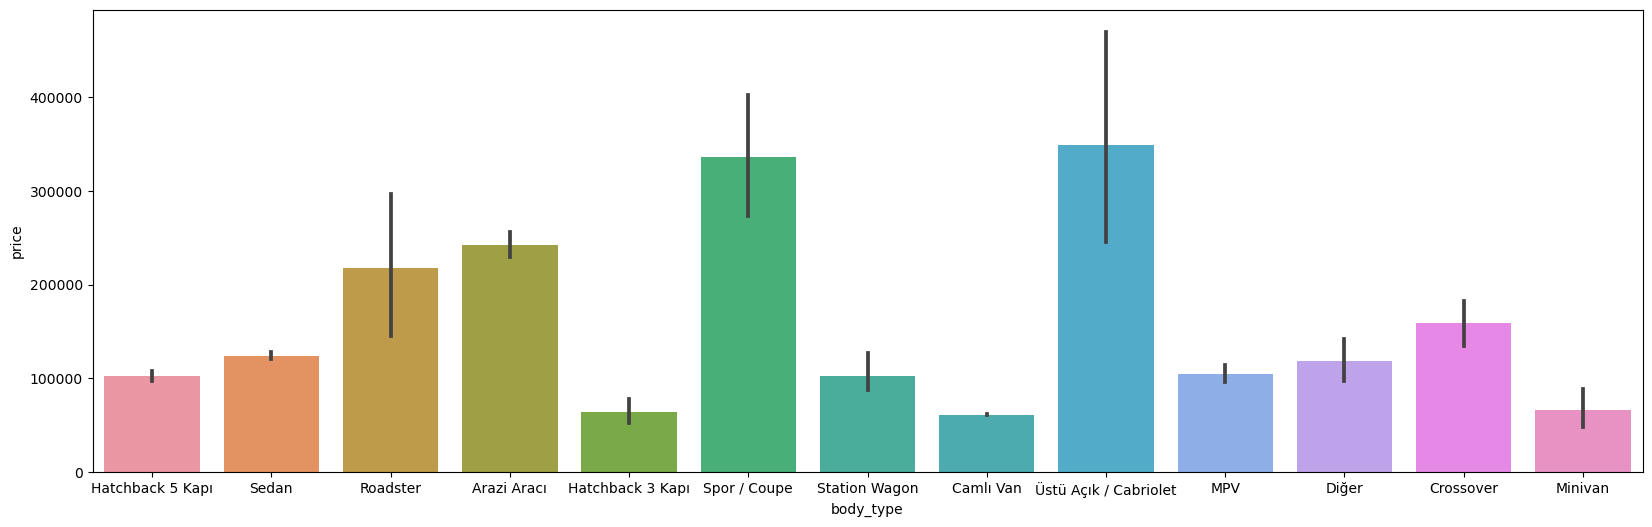

In [36]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.barplot(x = df["body_type"], y = df["price"], data = df)

Data Cleaning

In [37]:
df = df[df['seller'] != 'yetkili']

In [38]:
df = df[df['fuel_type'] != 'Elektrik']

In [39]:
df = df[df['fuel_type'] != 'Hibrit']

In [40]:
df.isna().sum()

date            0
brand           0
model           0
engine_size    44
fuel_type       0
gear_type       0
CCM             1
HP             44
color           0
body_type       0
seller          0
status          0
km              0
price           0
age             0
dtype: int64

In [41]:
df = df.dropna()

In [42]:
df.isna().sum()

date           0
brand          0
model          0
engine_size    0
fuel_type      0
gear_type      0
CCM            0
HP             0
color          0
body_type      0
seller         0
status         0
km             0
price          0
age            0
dtype: int64

In [43]:
df.shape

(8708, 15)

In [44]:
df.drop('date',axis=1,inplace=True)

In [45]:
df.reset_index(inplace = True)
df.drop('index',axis=1,inplace=True)

In [46]:
df.head(10)

,brand,model,engine_size,fuel_type,gear_type,CCM,HP,color,body_type,seller,status,km,price,age
0,Jaguar,XF,2.0 D Prestige Plus,Dizel,Otomatik Vites,1900.5,188.000000,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500,3.0
1,Acura,CL,2.2,Benzin/LPG,Düz Vites,1450.5,113.000000,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,26.0
2,Acura,CL,2.2,Dizel,Otomatik Vites,1900.5,163.000000,Beyaz,Sedan,Sahibinden,2. El,207000,148750,10.0
3,Acura,CL,2.2,Dizel,Düz Vites,1900.5,113.000000,Lacivert,Roadster,Galeriden,2. El,320000,42500,21.0
4,Acura,CL,2.2,Dizel,Otomatik Vites,1450.5,113.000000,Kırmızı,Sedan,Galeriden,2. El,183,170000,6.0
5,Jeep,Wrangler,2.8 CRD,Dizel,Otomatik Vites,2750.5,138.000000,Siyah,Arazi Aracı,Galeriden,2. El,54000,457500,6.0
6,Acura,CL,2.2,Dizel,Düz Vites,1540.4,116.083333,Gümüş Gri,Arazi Aracı,Galeriden,2. El,270,82500,8.0
7,Acura,CL,2.2,Benzin,Düz Vites,1300.0,88.000000,Mavi,Hatchback 5 Kapı,Galeriden,2. El,70000,77500,4.0
8,Acura,CL,Diğer,Dizel,Düz Vites,1700.5,100.000000,Gümüş Gri,Sedan,Sahibinden,2. El,99750,86500,8.0
9,Acura,CL,2.2,Dizel,Düz Vites,1700.5,113.000000,Bordo,Hatchback 5 Kapı,Sahibinden,2. El,302000,51000,9.0


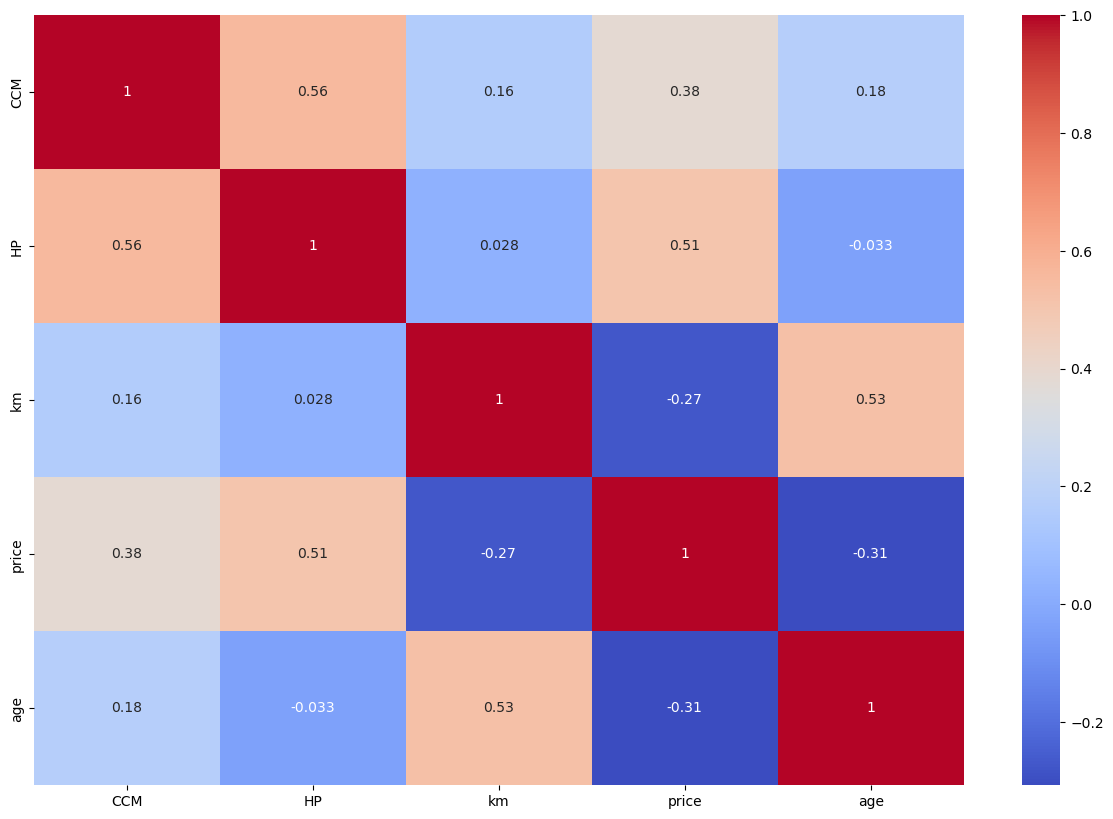

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Outlier Handling

In [48]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

IOC = q3 - q1

low = q1 - 1.5*IOC
high = q3 + 1.5*IOC

check = (df["price"] < low) | (df["price"] > high)
df["Outlier"] = check
df["Outlier"].value_counts()

False    7994
True      714
Name: Outlier, dtype: int64

In [49]:
df = df.loc[df["Outlier"] == False]
df.drop('Outlier', axis=1,inplace=True)

# Label Encoding

In [50]:
le = LabelEncoder()
columns = ["brand","model","engine_size","fuel_type","gear_type","body_type","seller","color","status"]
for i in columns:
    df[i] = le.fit_transform(df[i])

In [51]:
df.head(15)

,brand,model,engine_size,fuel_type,gear_type,CCM,HP,color,body_type,seller,status,km,price,age
1,0,119,1115,1,0,1450.5,113.000000,23,9,1,0,175000,19750,26.0
2,0,119,1115,2,1,1900.5,163.000000,4,9,1,0,207000,148750,10.0
3,0,119,1115,2,0,1900.5,113.000000,17,8,0,0,320000,42500,21.0
4,0,119,1115,2,1,1450.5,113.000000,16,9,0,0,183,170000,6.0
6,0,119,1115,2,0,1540.4,116.083333,11,0,0,0,270,82500,8.0
7,0,119,1115,0,0,1300.0,88.000000,18,5,0,0,70000,77500,4.0
8,0,119,1444,2,0,1700.5,100.000000,11,9,1,0,99750,86500,8.0
9,0,119,1115,2,0,1700.5,113.000000,5,5,1,0,302000,51000,9.0
10,12,319,683,0,1,1450.5,113.000000,4,0,0,0,75000,160000,5.0
11,0,119,1444,1,0,1450.5,100.000000,9,9,1,0,170000,55000,16.0


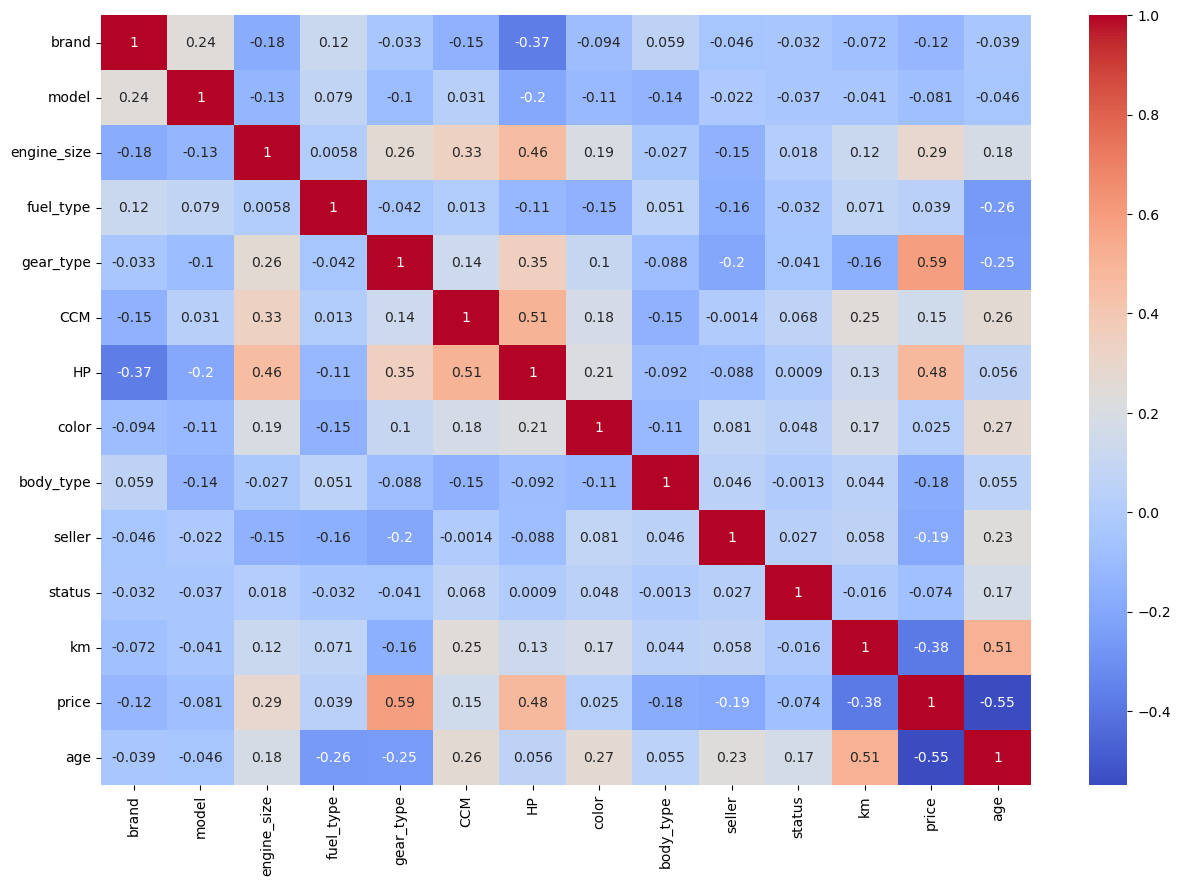

In [52]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
brand,7994.0,16.996748,8.867838,0.0,8.000000,20.000000,26.0,31.0
model,7994.0,167.046410,80.779508,0.0,104.000000,156.000000,228.0,339.0
engine_size,7994.0,758.671879,433.310916,0.0,483.000000,605.000000,1153.0,1550.0
fuel_type,7994.0,1.518764,0.723477,0.0,1.000000,2.000000,2.0,2.0
gear_type,7994.0,0.675632,0.819040,0.0,0.000000,0.000000,1.0,2.0
CCM,7994.0,1541.620188,349.551367,1300.0,1450.500000,1450.500000,1450.5,6001.0
HP,7994.0,112.488863,33.838085,63.0,95.282098,102.862319,113.0,601.0
color,7994.0,9.192019,6.621510,0.0,4.000000,5.000000,11.0,27.0
body_type,7994.0,6.698774,3.166323,0.0,5.000000,9.000000,9.0,12.0
seller,7994.0,0.196397,0.398555,0.0,0.000000,0.000000,0.0,2.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7994 entries, 1 to 8707
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        7994 non-null   int32  
 1   model        7994 non-null   int32  
 2   engine_size  7994 non-null   int32  
 3   fuel_type    7994 non-null   int32  
 4   gear_type    7994 non-null   int32  
 5   CCM          7994 non-null   float64
 6   HP           7994 non-null   float64
 7   color        7994 non-null   int32  
 8   body_type    7994 non-null   int32  
 9   seller       7994 non-null   int32  
 10  status       7994 non-null   int32  
 11  km           7994 non-null   int64  
 12  price        7994 non-null   int64  
 13  age          7994 non-null   float64
dtypes: float64(3), int32(9), int64(2)
memory usage: 655.8 KB


# Splitting Data

In [55]:
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LINEAR REGRESSION

In [56]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R^2: ", round(r2_score(y_test, y_pred), 2))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


Mean Squared Error: 1083113545.9394126
R^2:  0.68
MAE:  23198.02
RMSE:  32910.69


# DECISION TREE

In [57]:
# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R^2: ", round(r2_score(y_test, y_pred), 2))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))



Mean Squared Error: 512719008.4393497
R^2:  0.85
MAE:  13082.83
RMSE:  22643.3


# RANDOM FORREST

In [58]:
# Create and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R^2: ", round(r2_score(y_test, y_pred), 2))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


Mean Squared Error: 267236898.06500393
R^2:  0.92
MAE:  9716.41
RMSE:  16347.38


# KNN 

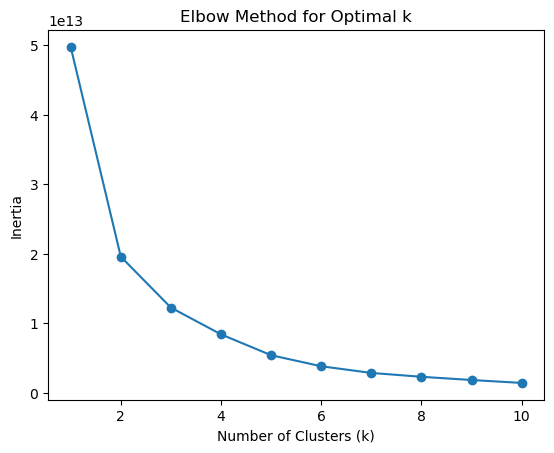

In [59]:
# Create an empty list to store the inertia values
inertia_values = []

# Define the range of k values to test
k_values = range(1, 11)

# Iterate through each k value and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [60]:
# Create and train the kNN Regressor model
k_value = 3  # Adjust the k value according to elbow method.
model = KNeighborsRegressor(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2 = r2_score(y_test, y_pred)
print("R^2: ", round(r2, 2))

# Print the MAE value
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", round(mae, 2))

# Print the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", round(rmse, 2))

Mean Squared Error: 2096382818.7563336
R^2:  0.39
MAE:  30243.55
RMSE:  45786.27


# POLYNOMIAL REGRESSION

In [61]:
# Create a Polynomial Features transformer with degree 2
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original features to polynomial features
poly_features = poly_conv.fit_transform(X)

# Split the data into training and testing sets using polynomial features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9)

# Create a Linear Regression model with polynomial features
poly_model = LinearRegression(fit_intercept=True)

# Train the Polynomial Regression model
poly_model.fit(X_train, y_train)

# Make predictions on the test set using the Polynomial Regression model
poly_test_pred = poly_model.predict(X_test)

# Evaluate the model performance
print("R^2: ", round(r2_score(y_test, poly_test_pred), 2))
print("MAE: ", round(mean_absolute_error(y_test, poly_test_pred), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, poly_test_pred)), 2))

R^2:  0.82
MAE:  16794.31
RMSE:  24313.8


# GPT REGRESSOR


In [62]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r2_gbt = round(r2_score(y_test, y_pred_gbt), 2)
mae_gbt = round(mean_absolute_error(y_test, y_pred_gbt), 2)
rmse_gbt = round(np.sqrt(mean_squared_error(y_test, y_pred_gbt)), 2)

# Evaluate the model performance
print("R^2: ", r2_gbt)
print("MAE: ", mae_gbt)
print("RMSE: ", rmse_gbt)

R^2:  0.89
MAE:  12840.88
RMSE:  19595.0


# Data Scaling

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7994 entries, 1 to 8707
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        7994 non-null   int32  
 1   model        7994 non-null   int32  
 2   engine_size  7994 non-null   int32  
 3   fuel_type    7994 non-null   int32  
 4   gear_type    7994 non-null   int32  
 5   CCM          7994 non-null   float64
 6   HP           7994 non-null   float64
 7   color        7994 non-null   int32  
 8   body_type    7994 non-null   int32  
 9   seller       7994 non-null   int32  
 10  status       7994 non-null   int32  
 11  km           7994 non-null   int64  
 12  price        7994 non-null   int64  
 13  age          7994 non-null   float64
dtypes: float64(3), int32(9), int64(2)
memory usage: 655.8 KB


In [64]:
df_scaled = df.drop('price', axis = 1)
scaler =StandardScaler()

features =scaler.fit(df_scaled)
features =features.transform(df_scaled)


# Convert to pandas Dataframe
df_scaled =pd.DataFrame(features,columns=df_scaled.columns)
df_scaled['price'] = df['price']

In [65]:
X = df_scaled.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        7994 non-null   float64
 1   model        7994 non-null   float64
 2   engine_size  7994 non-null   float64
 3   fuel_type    7994 non-null   float64
 4   gear_type    7994 non-null   float64
 5   CCM          7994 non-null   float64
 6   HP           7994 non-null   float64
 7   color        7994 non-null   float64
 8   body_type    7994 non-null   float64
 9   seller       7994 non-null   float64
 10  status       7994 non-null   float64
 11  km           7994 non-null   float64
 12  age          7994 non-null   float64
 13  price        7297 non-null   float64
dtypes: float64(14)
memory usage: 874.5 KB


In [67]:
df.head()

,brand,model,engine_size,fuel_type,gear_type,CCM,HP,color,body_type,seller,status,km,price,age
1,0,119,1115,1,0,1450.5,113.000000,23,9,1,0,175000,19750,26.0
2,0,119,1115,2,1,1900.5,163.000000,4,9,1,0,207000,148750,10.0
3,0,119,1115,2,0,1900.5,113.000000,17,8,0,0,320000,42500,21.0
4,0,119,1115,2,1,1450.5,113.000000,16,9,0,0,183,170000,6.0
6,0,119,1115,2,0,1540.4,116.083333,11,0,0,0,270,82500,8.0


In [68]:
df_scaled.head()

,brand,model,engine_size,fuel_type,gear_type,CCM,HP,color,body_type,seller,status,km,age,price
0,-1.916793,-0.594822,0.82239,-0.717088,-0.824959,-0.260694,0.015106,2.085453,0.726827,2.016417,-0.074449,0.331204,2.582502,NaN
1,-1.916793,-0.594822,0.82239,0.665213,0.396060,1.026751,1.492824,-0.784163,0.726827,2.016417,-0.074449,0.675434,0.194575,19750.0
2,-1.916793,-0.594822,0.82239,0.665213,-0.824959,1.026751,0.015106,1.179258,0.410984,-0.492804,-0.074449,1.890997,1.836275,148750.0
3,-1.916793,-0.594822,0.82239,0.665213,0.396060,-0.260694,0.015106,1.028226,0.726827,-0.492804,-0.074449,-1.549337,-0.402406,42500.0
4,-1.916793,-0.594822,0.82239,0.665213,-0.824959,-0.003491,0.106232,0.273064,-2.115764,-0.492804,-0.074449,-1.548401,-0.103915,170000.0


# LINEAR REGRESION WITH SCALED DATA

In [69]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2_lin = r2_score(y_test, y_pred)
print("R^2: ", round(r2_lin, 2))

# Print the MAE value
mae_lin = mean_absolute_error(y_test, y_pred)
print("MAE: ", round(mae_lin, 2))

# Print the RMSE value
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", round(rmse_lin, 2))

Mean Squared Error: 1083113545.9393995
R^2:  0.68
MAE:  23198.02
RMSE:  32910.69


# DECISION TREE REGRESSION WITH SCALED DATA

In [70]:
# Create and train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2_dt = r2_score(y_test, y_pred)
print("R^2: ", round(r2_dt, 2))

# Print the MAE value
mae_dt = mean_absolute_error(y_test, y_pred)
print("MAE: ", round(mae_dt, 2))

# Print the RMSE value
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", round(rmse_dt, 2));

Mean Squared Error: 505811245.4493539
R^2:  0.85
MAE:  13027.52
RMSE:  22490.25


# RANDOM FOREST REGRESSOR WITH SCALED DATA

In [71]:
# Create and train the RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rfr = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_rfr)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2_rf = r2_score(y_test, y_pred_rfr)
print("R^2: ", round(r2_rf, 2))

# Print the MAE value
mae_rf = mean_absolute_error(y_test, y_pred_rfr)
print("MAE: ", round(mae_rf, 2))

# Print the RMSE value
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print("RMSE: ", round(rmse_rf, 2))

Mean Squared Error: 269203185.41612434
R^2:  0.92
MAE:  9730.91
RMSE:  16407.41


# kNN REGRESION WITH SCALED DATA

In [433]:
# Set the k value as desired
k_value = 3

# Create and train the kNN Regressor model
model = KNeighborsRegressor(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2_knn = r2_score(y_test, y_pred)
print("R^2: ", round(r2_knn, 2))

# Print the MAE value
mae_knn = mean_absolute_error(y_test, y_pred)
print("MAE: ", round(mae_knn, 2))

# Print the RMSE value
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", round(rmse_knn, 2))

Mean Squared Error: 573539428.5832523
R^2:  0.83
MAE:  13979.65
RMSE:  23948.68


# POLYNOMIAL REGRESSION WITH SCALED DATA

In [434]:
# Create a Polynomial Features transformer with degree 2
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original features to polynomial features
poly_features = poly_conv.fit_transform(X)

# Split the data into training and testing sets using polynomial features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9)

# Create a Linear Regression model with polynomial features
poly_model = LinearRegression(fit_intercept=True)

# Train the Polynomial Regression model
poly_model.fit(X_train, y_train)

# Make predictions on the test set using the Polynomial Regression model
poly_test_pred = poly_model.predict(X_test)

r2_poly = round(r2_score(y_test, poly_test_pred), 2)
mae_poly = round(mean_absolute_error(y_test, poly_test_pred), 2)
rmse_poly = round(np.sqrt(mean_squared_error(y_test, poly_test_pred)), 2)

# Evaluate the model performance
print("R^2: ", round(r2_score(y_test, poly_test_pred), 2))
print("MAE: ", round(mean_absolute_error(y_test, poly_test_pred), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, poly_test_pred)), 2))

R^2:  0.82
MAE:  16792.46
RMSE:  24311.77


# GBT Regressor Model WITH SCALED DATA

In [435]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model performance

r2_gb = round(r2_score(y_test, y_pred_gb), 2)
mae_gb = round(mean_absolute_error(y_test, y_pred_gb), 2)
rmse_gb = round(np.sqrt(mean_squared_error(y_test, y_pred_gb)), 2)

# Evaluate the model performance
print("R^2: ", r2_gb)
print("MAE: ", mae_gb)
print("RMSE: ", rmse_gb)

R^2:  0.89
MAE:  12340.42
RMSE:  18862.54


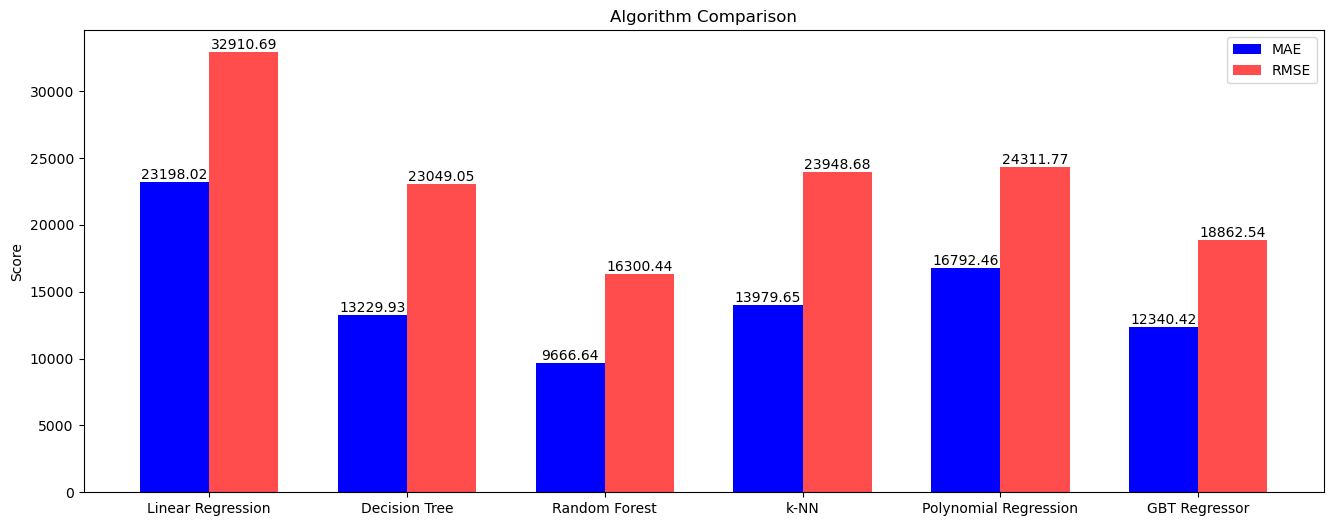

In [436]:
# Create a DataFrame containing scores and algorithm names
scores_df = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'k-NN', 'Polynomial Regression', 'GBT Regressor'],
    'MAE': [mae_lin, mae_dt, mae_rf, mae_knn, mae_poly, mae_gb],
    'RMSE': [rmse_lin, rmse_dt, rmse_rf, rmse_knn, rmse_poly, rmse_gb]
})

# Set the width of the bars
bar_width = 0.35

# Create a bar plot
fig, ax = plt.subplots(figsize=(16, 6))

# Set the positions of the bars on X-axis
bar_positions_mae = np.arange(len(scores_df))
bar_positions_rmse = bar_positions_mae + bar_width

# Add bars for MAE
bar1 = ax.bar(bar_positions_mae, scores_df['MAE'], width=bar_width, color='b', label='MAE')

# Add bars for RMSE
bar2 = ax.bar(bar_positions_rmse, scores_df['RMSE'], width=bar_width, color='r', label='RMSE', alpha=0.7)

# Add values on top of each bar
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Specify other plot properties
ax.set_xticks(bar_positions_mae + bar_width / 2)
ax.set_xticklabels(scores_df['Algorithm'])
ax.set_title('Algorithm Comparison')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()


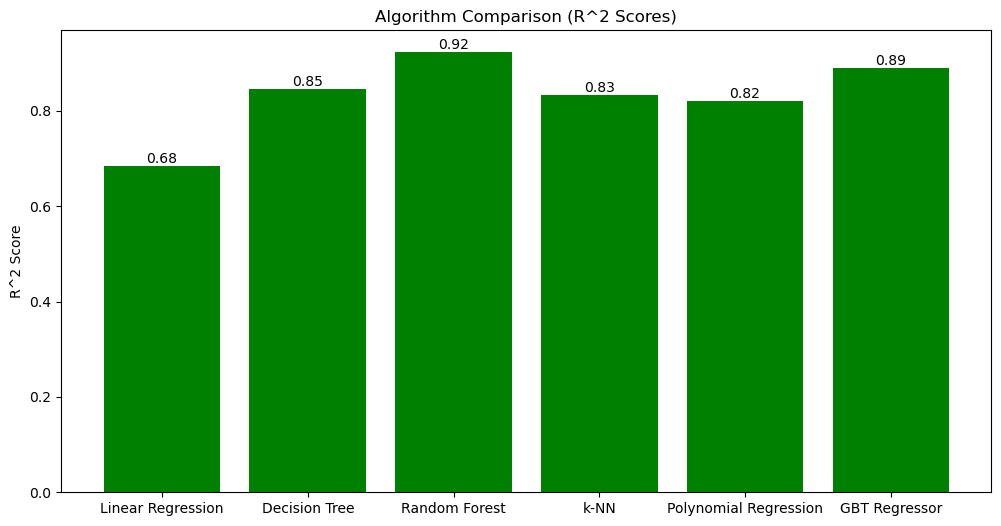

In [437]:
# Create a DataFrame containing R^2 scores and algorithm names
scores_df = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'k-NN', 'Polynomial Regression', 'GBT Regressor'],
    'R^2': [r2_lin, r2_dt, r2_rf, r2_knn, r2_poly, r2_gb],
})

# Create a bar plot for R^2 scores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(scores_df['Algorithm'], scores_df['R^2'], color='green')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Algorithm Comparison (R^2 Scores)')
plt.ylabel('R^2 Score')
plt.show()

# Model Tuning

In [438]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [439]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_model,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [440]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [441]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [442]:
randmf = RandomForestRegressor(n_estimators = rf_random.best_params_["n_estimators"], min_samples_split = rf_random.best_params_["min_samples_split"], min_samples_leaf= rf_random.best_params_["min_samples_leaf"], max_features = rf_random.best_params_["max_features"], max_depth= rf_random.best_params_["max_depth"], bootstrap= rf_random.best_params_["bootstrap"]) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=6, n_estimators=50)

In [443]:
y_pred_rfr2 = randmf.predict(X_test)
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_rfr2)
print(f'Mean Squared Error: {mse}')

# Print the R^2 value
r2_rf = r2_score(y_test,y_pred_rfr2)
print("R^2: ", round(r2_rf, 2))

# Print the MAE value
mae_rf = mean_absolute_error(y_test, y_pred_rfr2)
print("MAE: ", round(mae_rf, 2))

# Print the RMSE value
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rfr2))
print("RMSE: ", round(rmse_rf, 2))

Mean Squared Error: 267253598.21717638
R^2:  0.92
MAE:  9640.97
RMSE:  16347.89


In [444]:
df_ev = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price':y_pred_rfr2.astype(int)
})

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

df_ev.head(20)

,Actual Price,Predicted Price,Residual,Difference%
5657,263500,191036,72464,27.500569
3902,63950,87847,-23897,37.368256
1836,34000,39966,-5966,17.547059
6505,103500,98032,5468,5.283092
1238,70950,69239,1711,2.411557
7156,74900,74900,0,0.000000
2374,178500,156171,22329,12.509244
6260,46000,68033,-22033,47.897826
3119,88750,90363,-1613,1.817465
8342,140000,131924,8076,5.768571


In [445]:
df_ev.tail()

,Actual Price,Predicted Price,Residual,Difference%
5277,169900,174437,-4537,2.670394
6262,48500,56466,-7966,16.424742
6043,85000,83535,1465,1.723529
1729,96000,97037,-1037,1.080208
4160,14000,49037,-35037,250.264286


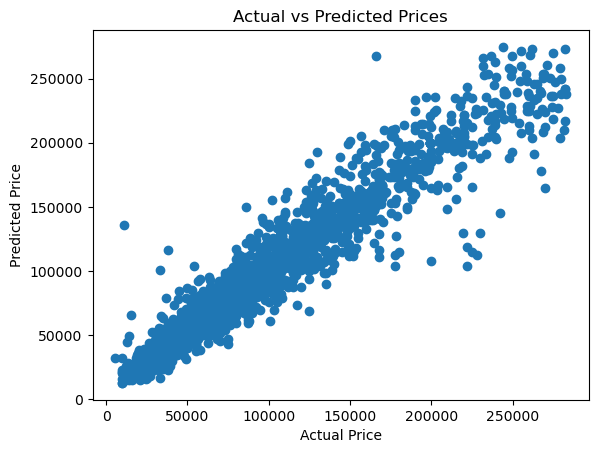

In [446]:
plt.scatter(df_ev['Actual Price'], df_ev['Predicted Price'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

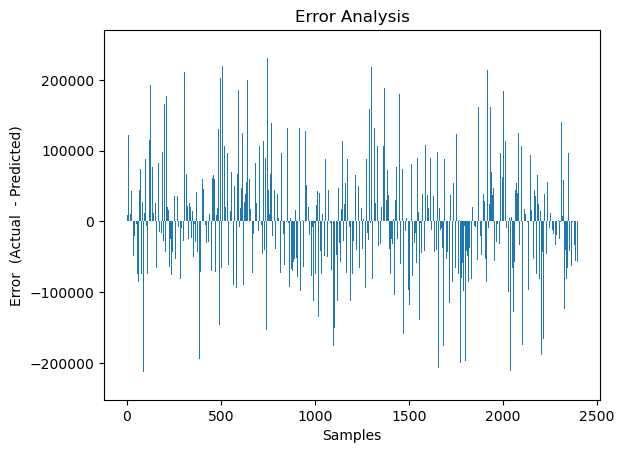

In [447]:
errors  = y_test - y_pred_rfr
plt.bar(range(len(errors )), errors )
plt.xlabel('Samples')
plt.ylabel('Error  (Actual  - Predicted)')
plt.title('Error Analysis')
plt.show()

# REPORT

The dataset was first scanned to understand and examine the data. Data preprocessing was then carried out as a result of these examinations. The features in the data set were translated into English and other processes continued on this basis. The 'Date' column has been removed from the dataset. 'CCM' and 'HP' features given as a range of numbers were averaged, converted to float values and added to the data set. Then, missing values in these columns were created based on the average of these values. In order to better fill in the large number of missing values in the 'HP' column with average values, the missing values in the 'HP' column were filled by grouping the brand features in the data set and taking the average of the groups. Then, the small number of missing data in other columns was filled directly by taking the average of that column, thus eliminating the missing data in the data set. Then, the rare new vehicles in the data set were removed because we were only interested in the prices of second-hand vehicles. 

Then, by making visualizations in the data set, we obtained information about the path we would follow later. We learned more about the dataset by visualizing various features in the dataset. Thanks to the heat map visualization and correlations, we learned which of the other features the 'Price' column we will make the prediction is most correlated with. Accordingly, the columns that interacted most with the 'price' column were 'HP', 'gear_type', 'age' and 'km' columns.

After the visualization process was completed, it was time to apply and test the regression models we will use for our data set. We used various models to predict the value of 'price' in our data set. These models were: 'knn, linear, polynomial, decision tree, random forrest, GBT' regression models. When we looked at the results of these models we applied, we saw that the 'Random forrest' algorithm worked better than other algorithms and had less margin of error. But at the same time, this algorithm worked slower than other algorithms. It surpassed other algorithms by reaching an R^2 score of 0.92, but despite everything, we still could not reach the accuracy levels we wanted in the models. Even though we tried different methods for this, the highest score we could reach was 0.92. I think the biggest factor causing this is that the 'Turkey used car' market data we have, which caused us to choose this problem, is that people value their vehicles more than they deserve. Because these algorithms are based on mathematical foundations, and since the 'Price' value we are trying to predict is a value determined by people, it is very difficult for the models to predict the deviant value from this reality.


